## Importing Libraries and dataset

In [54]:
import numpy as np

In [55]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns

In [58]:
%matplotlib inline

In [59]:
df=pd.read_csv("G:\downloads\survivalpredictiontitanic.csv")

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data analysis

In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


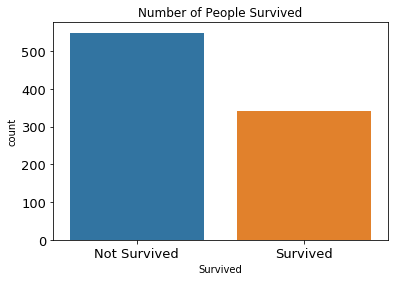

In [62]:
sns.countplot(x='Survived',data=df)
label=['Not Survived','Survived']
plt.xticks(df['Survived'].unique(), label, size=13)
plt.yticks(size=13)
plt.title("Number of People Survived")
plt.savefig('survived_people.png')
plt.show()

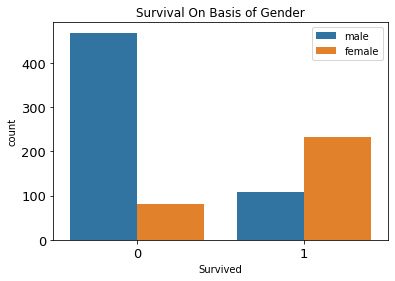

In [63]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Gender")
plt.legend(loc='best')
plt.savefig('Survival_gender.png')
plt.show()

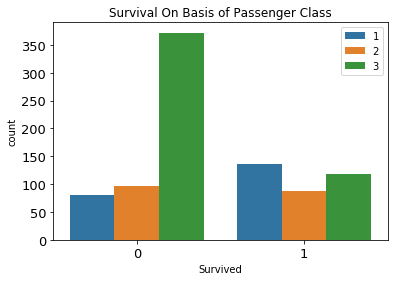

In [64]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title("Survival On Basis of Passenger Class")
plt.legend(loc='best')
plt.savefig('Survival_Pclass.png')
plt.show()

In [65]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data cleaning

In [67]:
df.drop('Cabin',axis=1,inplace=True)

In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
df.dropna(inplace=True)

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [71]:
Sex=pd.get_dummies(df['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [72]:
Passengerclass=pd.get_dummies(df['Pclass'])
Passengerclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [73]:
Embark=pd.get_dummies(df['Embarked'])
Embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [74]:
df=pd.concat([df,Sex,Passengerclass,Embark],axis=1)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [77]:
df.drop(['PassengerId','Pclass','Name','Ticket','Embarked','Sex'],axis=1,inplace=True)

In [78]:
df

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1,0,0,0,1,0,1,0
886,0,27.0,0,0,13.0000,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


In [79]:
X,Y=df.drop(['Survived','C','Q','S','male'],axis=1),df.Survived

In [80]:
X

,Age,SibSp,Parch,Fare,female,1,2,3
0,22.0,1,0,7.2500,0,0,0,1
1,38.0,1,0,71.2833,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0
4,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,1,0,0,1
886,27.0,0,0,13.0000,0,0,1,0
887,19.0,0,0,30.0000,1,1,0,0
889,26.0,0,0,30.0000,0,1,0,0


In [81]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [83]:
X.shape

(712, 8)

In [84]:
Y.shape

(712,)

## Splitting into test and train

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [88]:
x_train

,Age,SibSp,Parch,Fare,female,1,2,3
472,33.0,1,2,27.7500,1,0,1,0
432,42.0,1,0,26.0000,1,0,1,0
666,25.0,0,0,13.0000,0,0,1,0
30,40.0,0,0,27.7208,0,1,0,0
291,19.0,1,0,91.0792,1,1,0,0
...,...,...,...,...,...,...,...,...
93,26.0,1,2,20.5750,0,0,0,1
135,23.0,0,0,15.0458,0,0,1,0
338,45.0,0,0,8.0500,0,0,0,1
549,8.0,1,1,36.7500,0,0,1,0


In [89]:
x_test

,Age,SibSp,Parch,Fare,female,1,2,3
641,24.0,0,0,69.3000,1,1,0,0
496,54.0,1,0,78.2667,1,1,0,0
262,52.0,1,1,79.6500,0,1,0,0
311,18.0,2,2,262.3750,1,1,0,0
551,27.0,0,0,26.0000,0,0,1,0
...,...,...,...,...,...,...,...,...
362,45.0,0,1,14.4542,1,0,0,1
56,21.0,0,0,10.5000,1,0,1,0
137,37.0,1,0,53.1000,0,1,0,0
651,18.0,0,1,23.0000,1,0,1,0


## Model building using Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr=LogisticRegression()

In [92]:
lr.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred=lr.predict(x_test)

In [94]:
pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

## Predicting new result's

In [95]:
lr.predict([[33,1,2,250.00,1,0,1,1]])

array([0], dtype=int64)

## Calculating it's accuracy

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
acc = round(accuracy_score(pred, y_test) * 100, 2)
print(acc)

80.42
